In [ ]:
# Cài đặt các thư viện cần thiết
!pip install networkx matplotlib

# Import các thư viện
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman, label_propagation_communities

In [ ]:
# Tạo đồ thị mẫu
G = nx.karate_club_graph()  # Đồ thị Karate Club là một đồ thị kinh điển thường được dùng trong phát hiện cộng đồng

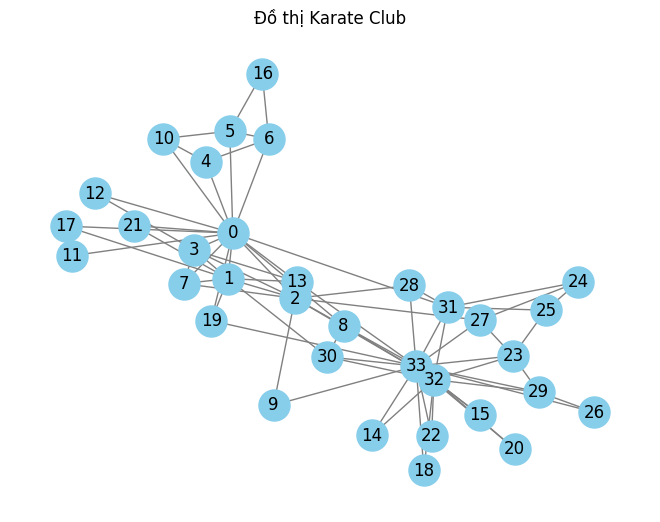

In [ ]:
# Vẽ đồ thị
pos = nx.spring_layout(G)  # Sử dụng thuật toán spring_layout để bố trí các nút
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title("Đồ thị Karate Club")
plt.show()

Phát hiện cộng đồng dựa trên nhóm (Group-based Community)

In [ ]:
# Thuật toán Girvan-Newman
def girvan_newman_example(graph):
    communities = girvan_newman(graph)  # Tìm các cộng đồng theo Girvan-Newman
    first_level_communities = next(communities)  # Lấy kết quả phân chia đầu tiên
    return [list(community) for community in first_level_communities]

# Chạy Girvan-Newman
gn_communities = girvan_newman_example(G)
print("Các cộng đồng theo Girvan-Newman:", gn_communities)

Các cộng đồng theo Girvan-Newman: [[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


Phát hiện cộng đồng dựa trên node (Member-based Community)


In [ ]:
# Thuật toán Lan truyền nhãn (Label Propagation)
def label_propagation_example(graph):
    communities = label_propagation_communities(graph)  # Tìm các cộng đồng
    return [list(community) for community in communities]

# Chạy Label Propagation
lp_communities = label_propagation_example(G)
print("Các cộng đồng theo Label Propagation:", lp_communities)

Các cộng đồng theo Label Propagation: [[0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31], [32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30], [16, 5, 6]]


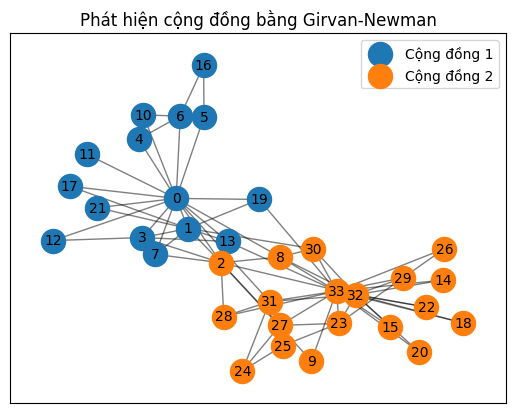

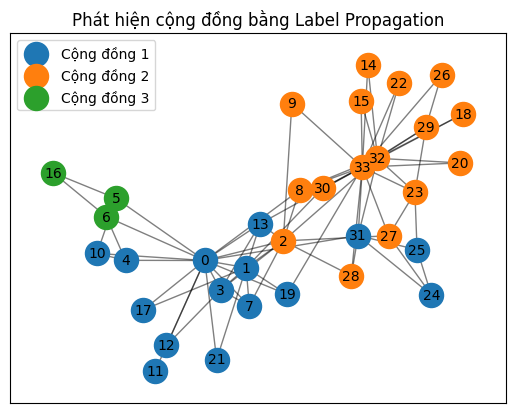

In [ ]:
# Vẽ đồ thị và minh hoạ kết quả

def draw_communities(graph, communities, title):
    # Tạo bản đồ các cộng đồng
    pos = nx.spring_layout(graph)  # Bố trí các nút theo spring layout
    colors = [plt.cm.tab10(i) for i in range(len(communities))]  # Màu sắc cho các cộng đồng

    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(graph, pos, nodelist=community, node_color=[colors[i]], label=f"Cộng đồng {i+1}")

    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos, font_size=10)

    plt.title(title)
    plt.legend()
    plt.show()

# Minh hoạ kết quả Girvan-Newman
draw_communities(G, gn_communities, "Phát hiện cộng đồng bằng Girvan-Newman")

# Minh hoạ kết quả Label Propagation
draw_communities(G, lp_communities, "Phát hiện cộng đồng bằng Label Propagation")